## 데이터 전처리 및 EDA

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [35]:
#os.chdir('./GitHub/seoul_metro_profit_analysis')
os.getcwd()

'/Users/jaeminiman/Documents/GitHub/seoul_metro_profit_analysis'

In [36]:
csv_list = [i for i in os.listdir(os.getcwd() + '/data') if i.endswith('.csv')]
csv_list.sort()
csv_list

['data1.csv',
 'data2.csv',
 'data3.csv',
 'data4.csv',
 'data5.csv',
 '도시철도_총괄지표.csv',
 '무임승차_대상별_현황.csv',
 '서울교통공사_역간이용인원_211031.csv',
 '서울교통공사_월별 승차인원_20191231.csv',
 '서울교통공사_월별 승차인원_20201231.csv',
 '서울교통공사_월별 승차인원_20211231.csv',
 '서울교통공사_월별 승차인원_20220831.csv',
 '성_및_연령별_추계인구.csv',
 '승객_1인당_운임손실_현황.csv',
 '운영기관별_손익계산서.csv']

#### 문제확인

In [37]:
df1 = pd.read_csv(os.getcwd() + "/data/" + csv_list[0], header=0)

In [38]:
df1 = df1.iloc[:6,:]
df1

,년도,영업 수입 소계,운수사업수익,기타사업수익,소계,인건비,경비,영업 손익,영업외수익,영업외비용,경상 손익
0,2017,19673,16165,3508,24892,12911,11981,-5219,772,807,-5254
1,2018,19865,16234,3631,25187,12748,12439,-5322,1684,1751,-5389
2,2019,20046,16367,3679,25370,12602,12768,-5324,504,1045,-5865
3,2020,15595,11932,3663,26497,13551,12946,-10902,507,743,-11138
4,2021,16291,12542,3749,25676,12267,13409,-9385,511,770,-9644


In [39]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'

Text(0.5, 1.0, '5년간의 서울교통공사 수익 및 지출액')

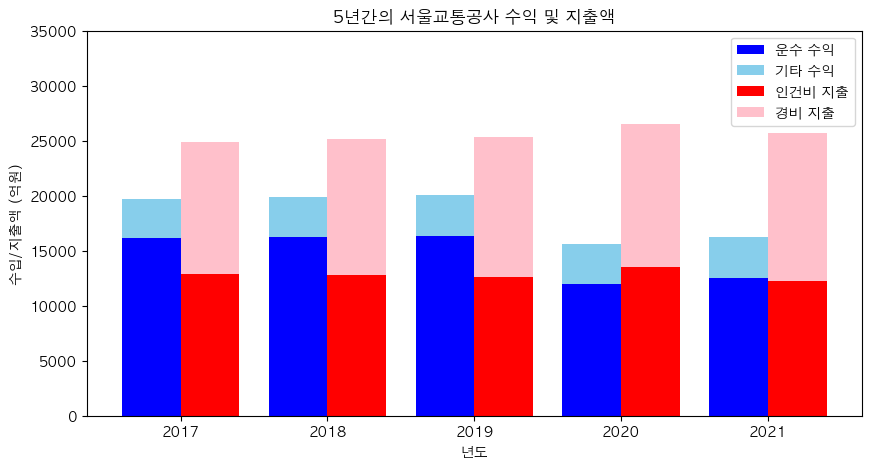

In [40]:
N = 5
ind = np.arange(N)
wid = 0.4

val1 = df1['운수사업수익']
val2 = df1['기타사업수익']
val3 = df1['인건비']
val4 = df1['경비']
val5 = df1['영업 손익'].apply(lambda x: -x)

plt.figure(figsize= (10, 5))

plt.bar(ind-wid/2, val1, width = wid, color = 'blue', label = "운수 수익")
plt.bar(ind-wid/2, val2, width = wid, color = 'skyblue', bottom=val1, label = "기타 수익" )
plt.bar(ind+wid/2, val3, width = wid, color = 'red', label = "인건비 지출")
plt.bar(ind+wid/2, val4, width = wid, color = 'pink', bottom = val3, label = "경비 지출")

plt.xticks(ind, df1['년도'])
plt.ylim((0, 35000))
plt.xlabel("년도")
plt.ylabel("수입/지출액 (억원)")
plt.legend()

plt.title("5년간의 서울교통공사 수익 및 지출액")


Text(0.5, 1.0, '5년간의 서울교통공사 적자규모')

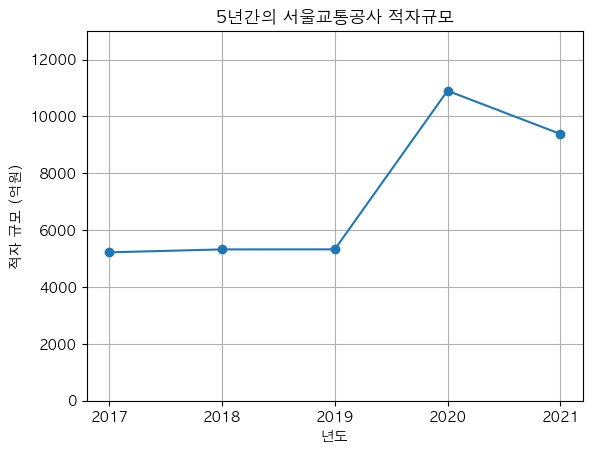

In [41]:
plt.plot(ind, val5, marker = 'o', linestyle = '-')

plt.xticks(ind, df1["년도"])
plt.ylim((0, 13000))

plt.xlabel("년도")
plt.ylabel("적자 규모 (억원)")
plt.grid()
plt.title("5년간의 서울교통공사 적자규모")


#### Q2. 코로나 이후에 지하철 이용객이 얼마만큼 회복될까?

In [42]:
csv_list[2]

'data3.csv'

In [43]:
df2 = pd.read_csv(os.getcwd() + "//data//" + csv_list[2], header=0)
df2.drop(index=[0,1,6], inplace=True)
df2.set_index(df2.columns[0], inplace=True)

Text(12.4, 50000000.0, '코로나 확진자 발생')

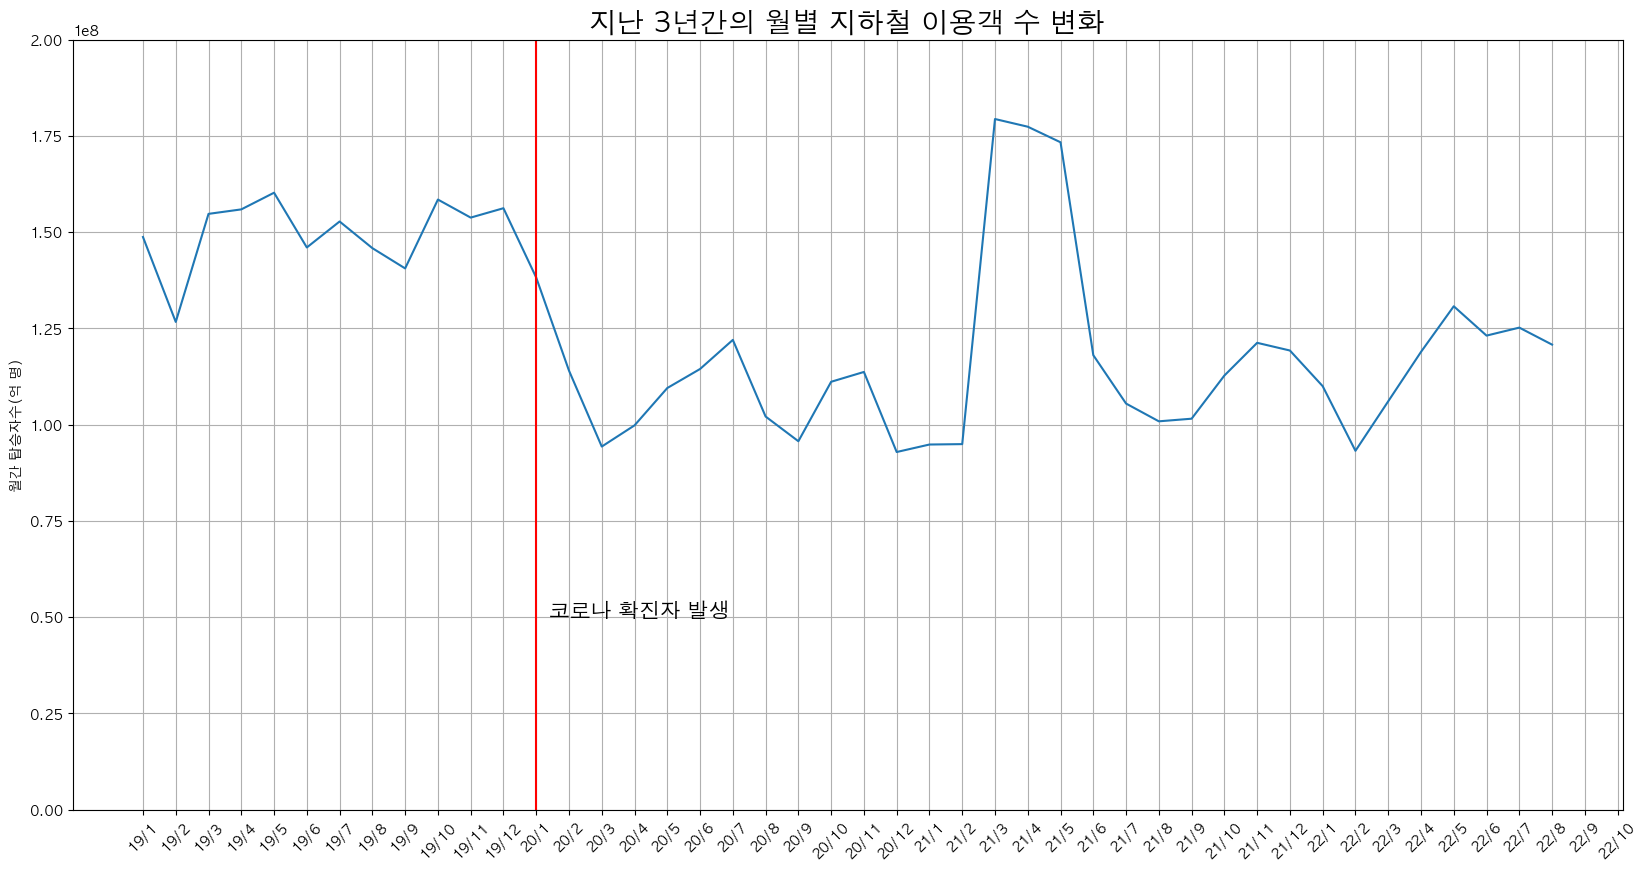

In [44]:
plt.figure(figsize=(20, 10))
plt.plot(df2.to_numpy().flatten())
plt.xticks(range(0,48), [str(k) + '/' + j for k in range(19, 23) for j in [ str(i) for i in range(1, 13)]], rotation=45)
plt.ylim((0, 2e8))
plt.ylabel('월간 탑승자수(억 명)')
plt.grid()
plt.title("지난 3년간의 월별 지하철 이용객 수 변화", size=20)
plt.vlines(x = 12, colors='red', ymin=0, ymax=2e8)
plt.text(x=12.4, y= 0.5e8, s='코로나 확진자 발생', size = 15)

In [45]:
csv_list

['data1.csv',
 'data2.csv',
 'data3.csv',
 'data4.csv',
 'data5.csv',
 '도시철도_총괄지표.csv',
 '무임승차_대상별_현황.csv',
 '서울교통공사_역간이용인원_211031.csv',
 '서울교통공사_월별 승차인원_20191231.csv',
 '서울교통공사_월별 승차인원_20201231.csv',
 '서울교통공사_월별 승차인원_20211231.csv',
 '서울교통공사_월별 승차인원_20220831.csv',
 '성_및_연령별_추계인구.csv',
 '승객_1인당_운임손실_현황.csv',
 '운영기관별_손익계산서.csv']

In [46]:
df3 = pd.read_csv(os.getcwd() + "//data//data4.csv", header=0, encoding='euc-kr')
df3.drop(index=0, inplace=True)
df3.set_index('운영기관별', inplace=True)
df3.iloc[0] = df3.iloc[0].astype(int)
df3.head()

,2017,2018,2019,2020,2021
운영기관별,,,,,
서울교통공사,942,946,945,953,998


(900.0, 1050.0)

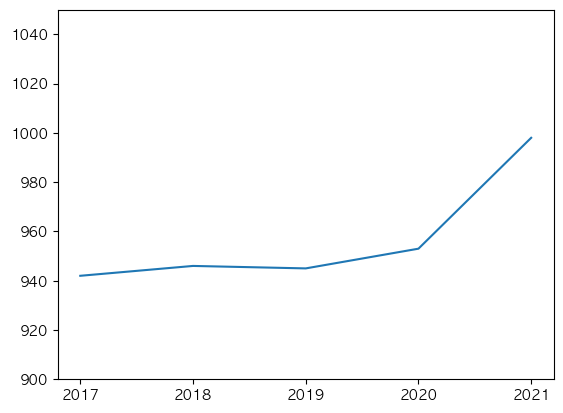

In [47]:
plt.plot(df3.iloc[0])
plt.ylim(900, 1050)

In [48]:
df4 = pd.read_csv(os.getcwd() + '//data//data5.csv', header=0, encoding='euc-kr')
df4.set_index('운영기관별(1)', inplace=True)
df4.head()

,노인,장애인,국가유공자
운영기관별(1),,,
2017,208466,46405,3379
2018,212843,44967,3237
2019,225094,45644,3103
2020,160053,33460,2177
2021,170771,32868,2109


In [49]:
df4['노인 비율'] = df4['노인'] / (df4['노인'] + df4['장애인'] + df4['국가유공자'])
df4['총 인원'] = (df4['노인'] + df4['장애인'] + df4['국가유공자'])
df4.head()

,노인,장애인,국가유공자,노인 비율,총 인원
운영기관별(1),,,,,
2017,208466,46405,3379,0.807226,258250
2018,212843,44967,3237,0.815344,261047
2019,225094,45644,3103,0.821988,273841
2020,160053,33460,2177,0.817891,195690
2021,170771,32868,2109,0.830001,205748


In [50]:
df2_ = pd.read_csv(os.getcwd() + "//data//" + csv_list[1], header=0)

In [51]:
df2_.set_index('년도', inplace=True)
df2_.head()

,무임승차 계 (천명),무임비용 계(백만원),무임승차 노인 (천명),무임비용 노인 (백만원),무임승차 장애인 (천명),무임비용 장애인 (백만원),무임승차 국가유공자 (천명),무임비용 국가유공자 (백만원),승차인원
년도,,,,,,,,,
2017,258250,350647,208466,283059,46405,63000,3379,4588,1751579
2018,261047,353974,212843,288617,44967,60969,3237,4388,1751579
2019,273841,370926,225094,304929,45644,61831,3103,4166,1769156
2020,195690,264255,160053,216135,33460,45181,2177,2939,1282565
2021,205748,278438,170771,231108,32868,44477,2109,2853,1291497


In [52]:
# 서울특별시 고령인구비율(65세이상)
ratio = pd.Series([13.8, 14.4, 15.2, 16.1, 16.8], index = [2017, 2018, 2019, 2020, 2021])

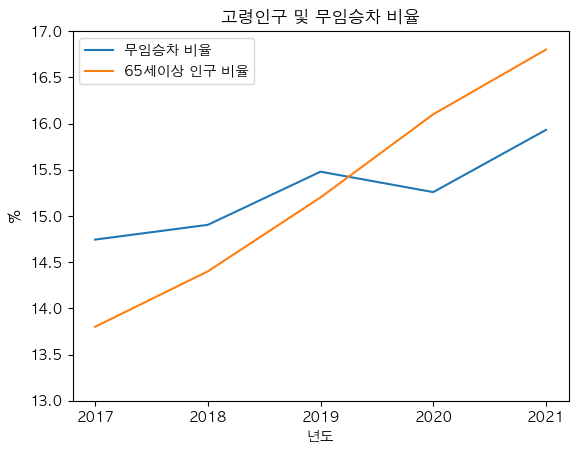

In [53]:
plt.plot(df2_['무임승차 계 (천명)']/df2_['승차인원'] * 100, label = '무임승차 비율')
plt.plot(ratio, label = '65세이상 인구 비율')
plt.ylim(13, 17)
plt.xticks(range(2017, 2022))
plt.title('고령인구 및 무임승차 비율')
plt.xlabel('년도')
plt.ylabel('%')
plt.legend()